1.0
0.5


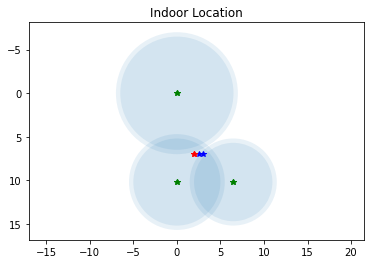

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from typing import List, TypedDict, Tuple, Dict, Optional, Union
from math import sqrt
Point = Tuple[float, float]
Distance = Tuple[str, float]
Distances = List[Distance]

# 路由器位置参数，不用修改了
rs = [[0.0, 0.0], [0.0, 10.2], [6.47, 10.2]]

def error(cal_point:Tuple[float,float],
          real_point:Tuple[float,float])->float:
    return sqrt(pow(cal_point[0]-real_point[0],2) + pow(cal_point[1]-real_point[1],2))

# 支持同时画多个图
def plot_results(distances:List[List[float]],
                 cal_points:List[Tuple[float,float]],
                 real_points:List[Tuple[float,float]]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for distance,cal_point,real_point in zip(distances,cal_points,real_points):# 画圆
        for i in range(3):
            plt.plot(rs[i][0],rs[i][1],'g*')
            cir1 = Circle(xy = rs[i], radius=distance[i], alpha=0.1)
            ax.add_patch(cir1)

        plt.plot(cal_point[0],cal_point[1],'b*')
        plt.plot(real_point[0],real_point[1],'r*')
        print(error(cal_point,real_point))#计算误差  
    
    ax.invert_yaxis() 
    plt.axis('scaled')
    plt.axis('equal') 
    plt.title('Indoor Location')
    

#示例/在这里手动修改

# 多个时刻，每个时刻三个距离，由get_distance得到
distances = [[7,5,5],[6.5,5.5,4.5]]
# 多个时刻，计算出来的定位点【蓝点】，由get_position得到
cal_points = [(3,7),(2.5,7)]
# 多个时刻，真实的定位点【红点】
real_points = [(2,7),(2,7)]

plot_results(distances,cal_points,real_points)